In [3]:
#importing libraries and loading data set

import numpy as np # linear algebra
import pandas as pd # data processing
import scipy.io
import matplotlib.pyplot as plt
import os
from scipy import signal
from scipy.fft import fft, fftshift

file_names=[]
for dirname, _, filenames in os.walk('/Users/aman/Github bs/datasets/EEG Data/'):
    for filename in filenames:
        file_names.append(os.path.join(dirname, filename))
        #print(os.path.join(dirname, filename))
        
print(file_names)

# each trial is about 54 mins


['/Users/aman/Github bs/datasets/EEG Data/eeg_record7.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record6.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record4.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record5.mat', '/Users/aman/Github bs/datasets/EEG Data/.DS_Store', '/Users/aman/Github bs/datasets/EEG Data/eeg_record1.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record2.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record3.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record16.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record17.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record15.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record29.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record28.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record14.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record10.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record11.mat', '/Users/aman/Github bs/datasets/EEG Data/eeg_record13

In [1]:
# building a 5 order high pass filter
from scipy.signal import butter, lfilter, freqz   
# ----- ----- ----- -----    
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    x = signal.filtfilt(b, a, data)
    y = signal.filtfilt(b, a, x)
    return y


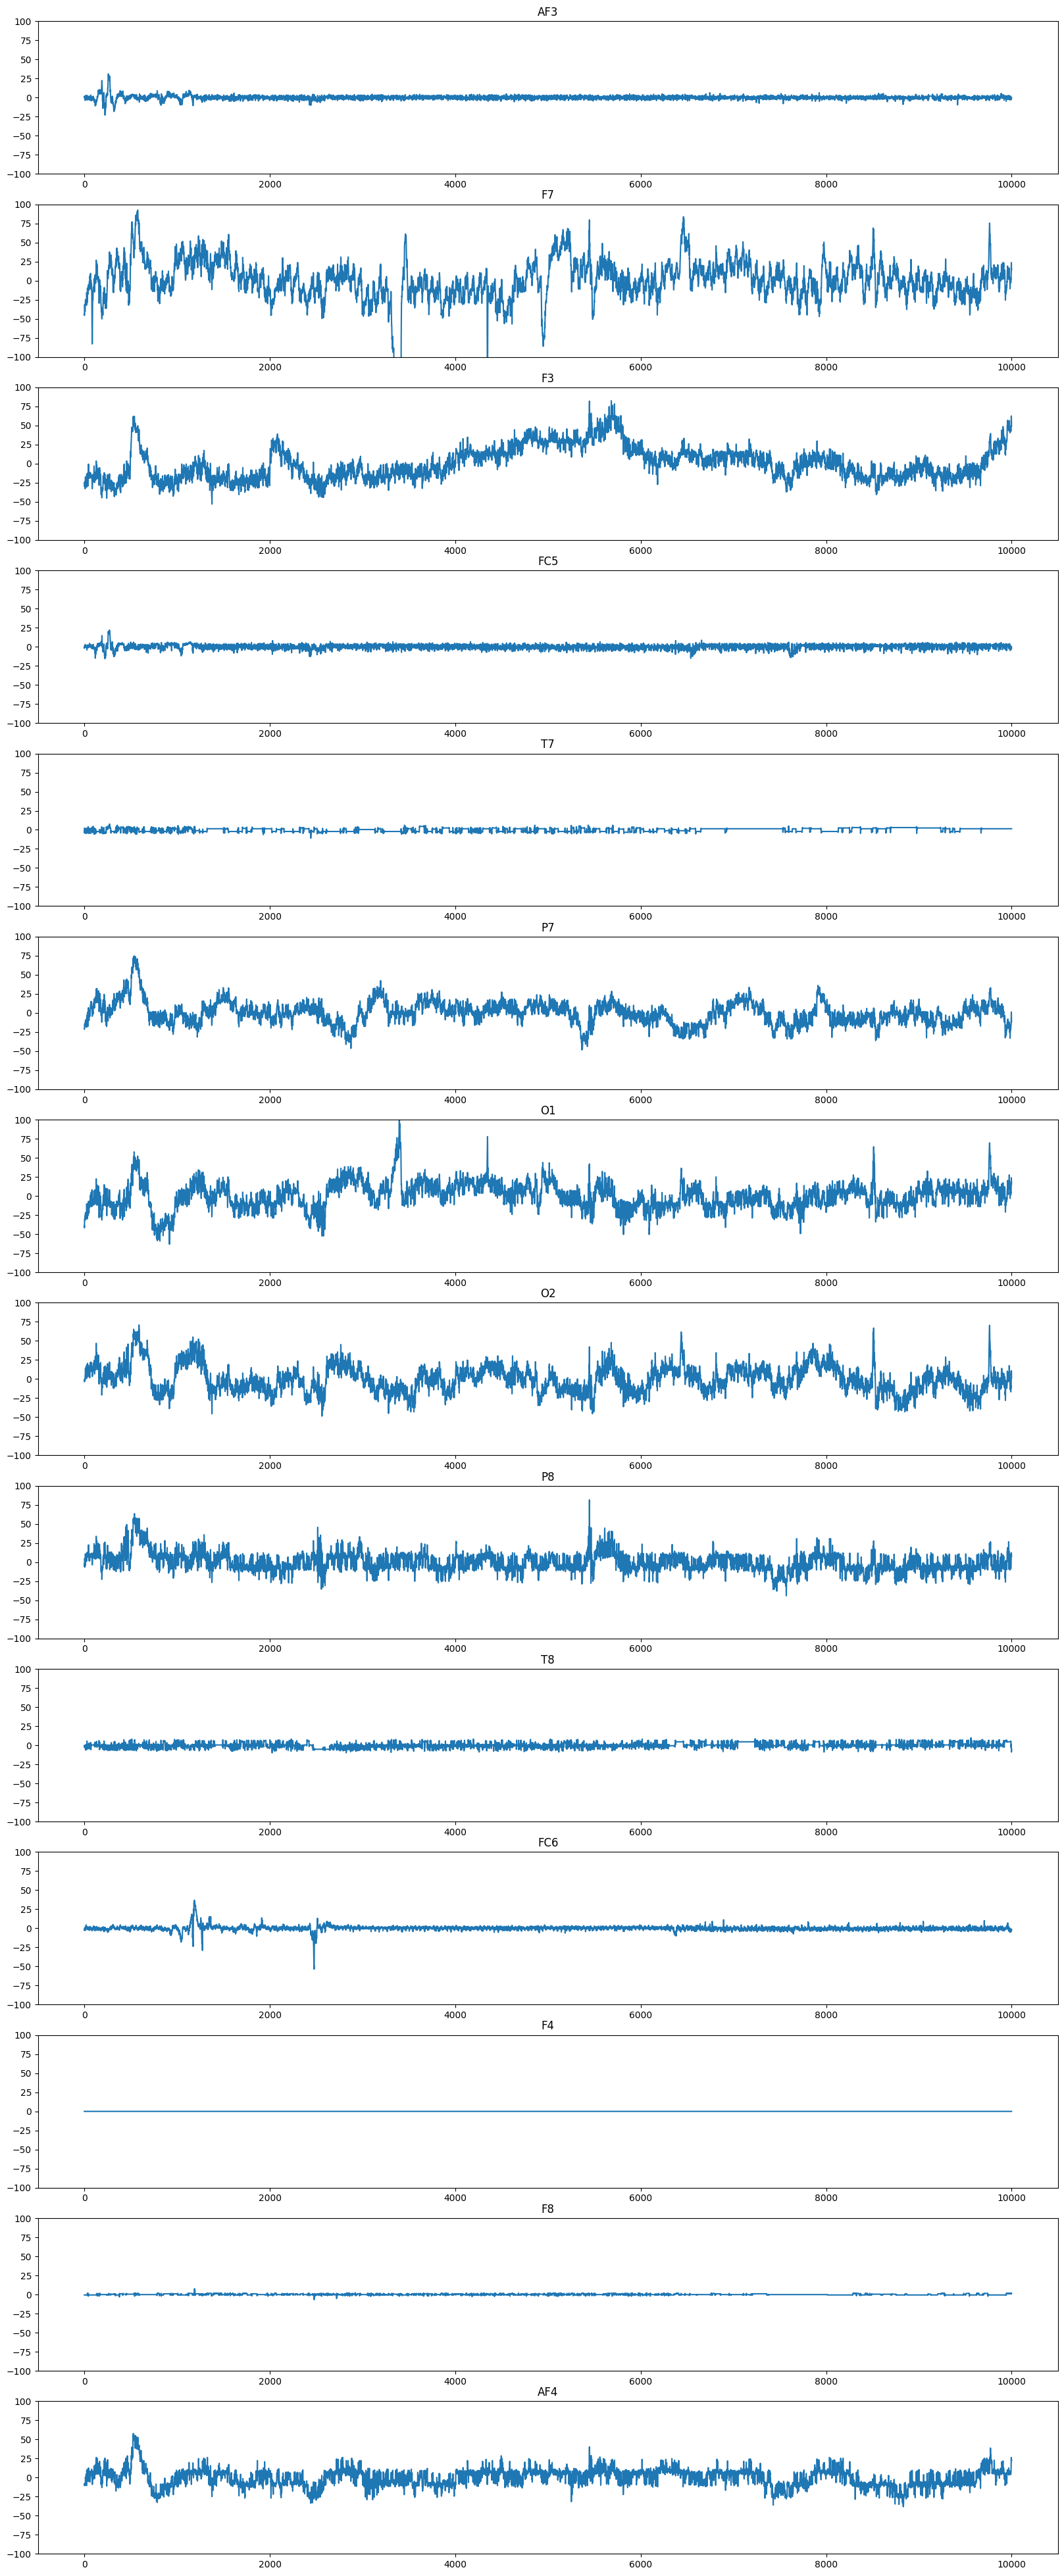

In [4]:
#According to the plot, ['F7','F3','P7','O1','O2','P8','AF4'] are useful channels.


fig, ax = plt.subplots(14,1)    
fig.set_figwidth(20)
fig.set_figheight(50)
#fig.set_size_inches(10,10)
mat = scipy.io.loadmat(file_names[0])
data = mat['o']['data'][0,0]
FS = mat['o']['sampFreq'][0][0][0][0]
channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
for i in range(14):
    data_ave = data[5000:15000,i+3]-np.mean(data[5000:15000,i+3])
    ax[i].plot(data_ave)
    ax[i].set_title(channels[i])
    ax[i].set_ylim(-100,100)

In [ ]:
#F7,F3,P7,O1,O2,P8,AF4 : the ones with actual visible variation

useful_channels=[4,5,8,9,10,11,16]
useful_channels_names=['F7','F3','P7','O1','O2','P8','AF4']
fig,ax = plt.subplots(7)
fig.set_size_inches(20,40)
j=0
for i in useful_channels:
    data_ave = data[5000:15000,i]-np.mean(data[5000:15000,i])
    ax[j].plot(data_ave)
    ax[j].set_ylim(-200,200)
    ax[j].set_title(channels[i-3])
    j=j+1